In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, weibull_min
from scipy.optimize import minimize

In [35]:
# Generate synthetic data
data = np.concatenate([
    np.random.normal(-1.0, 0.5, 5000),
    np.random.normal(2.0, 0.5, 10000)
])

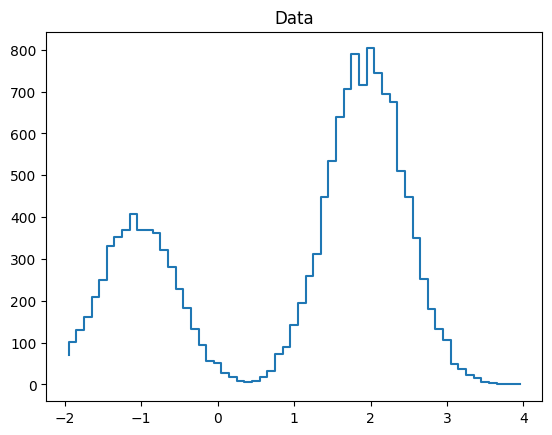

In [44]:
# Create histogram
hist, edges = np.histogram(data, bins=np.arange(-2, 4.1, 0.1))

# Plot data
plt.plot((edges[1:] + edges[:-1]) / 2, hist, drawstyle='steps', label='Data')
plt.title('Data')
plt.show()

# True parameter values
true_par_values = {'a': [500, 1000], 'mu': [-1.0, 2.0], 'sigma': 0.5}


In [45]:
def fit_function(params, x):
    a = params['a']
    mu = params['mu']
    var = params['sigma'] * params['sigma']

    term1 = np.exp(-((x - mu[0]) ** 2) / (2 * var)) / (np.sqrt(2 * np.pi * var))
    term2 = np.exp(-((x - mu[1]) ** 2) / (2 * var)) / (np.sqrt(2 * np.pi * var))

    return a[0]*term1 + a[1]*term2

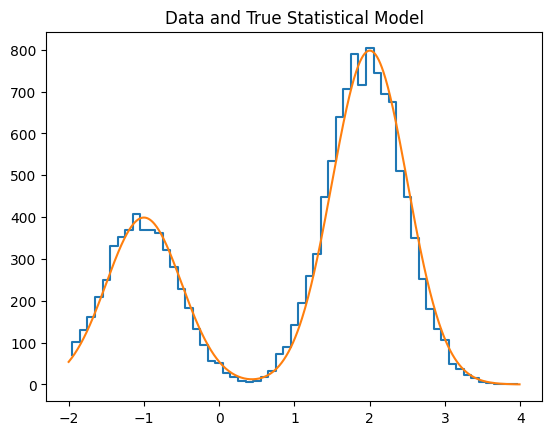

In [46]:
# Plot data and true model
plt.plot((edges[1:] + edges[:-1]) / 2, hist, drawstyle='steps', label='Data')
plt.plot(np.arange(-2, 4, 0.01), fit_function(true_par_values, np.arange(-2, 4, 0.01)), label='Truth')
plt.title('Data and True Statistical Model')
plt.show()


In [47]:
# Define likelihood function
def likelihood(params):
    # Histogram counts for each bin
    observed_counts = hist

    # Histogram binning
    bin_edges = edges
    bin_edges_left = bin_edges[:-1]
    bin_edges_right = bin_edges[1:]
    bin_widths = bin_edges_right - bin_edges_left
    bin_centers = (bin_edges_right + bin_edges_left) / 2

    # Log-likelihood for a single bin
    def bin_log_likelihood(i):
        # Simple mid-point rule integration of fit function over bin
        expected_counts = bin_widths[i] * fit_function(params, bin_centers[i])
        # Avoid zero expected counts for numerical stability
        return poisson.logpmf(observed_counts[i], expected_counts + np.finfo(float).eps)

    # Sum log-likelihood over bins
    ll_value = bin_log_likelihood(0)
    for i in range(1, len(observed_counts)):
        ll_value += bin_log_likelihood(i)

    return ll_value

In [48]:
likelihood(true_par_values)

-21090.815198141343